In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.io
import math
import os

%matplotlib inline
warnings.filterwarnings("ignore")

In [8]:
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=1)

In [9]:
simulation_names = ['linear', 'exponential', 'cubic', 'joint_normal', 'step',
                    'quadratic', 'w_shape', 'spiral', 'bernoulli', 'log',
                    'fourth_root', 'sine_4pi', 'sine_16pi', 'square', 'two_parabolas',
                    'circle', 'ellipse', 'diamond', 'multi_noise', 'multi_indept']

In [41]:
def get_data(simulation_type):
    file_name_prefix = './sample_data_viz/type_{}'.format(simulation_type)

    ori_X = scipy.io.loadmat(file_name_prefix + '_X.mat')['x_mtx']
    ori_Y = scipy.io.loadmat(file_name_prefix + '_Y.mat')['y_mtx']
    
    min_X = np.amin(ori_X)
    min_Y = np.amin(ori_Y)
    max_X = np.amax(ori_X-min_X)
    max_Y = np.amax(ori_Y-min_Y)
    
    matrix_X = (ori_X-min_X)*2/max_X - 1
    matrix_Y = (ori_Y-min_Y)*2/max_Y - 1
    
    return matrix_X, matrix_Y

In [42]:
def rotate_by_theta(x, y, theta):
    # rotation transform matrix
    c, s = np.cos(math.radians(theta)), np.sin(math.radians(theta))
    rotation_matrix = np.array([[c, s], [-s, c]])

    # apply two sample transform
    data_matrix = np.concatenate([x, y], axis=1)
    rotated_data_matrix = np.dot(rotation_matrix, data_matrix.T).T
    x_rotated, y_rotated = np.hsplit(rotated_data_matrix, 2)
    
    return x_rotated, y_rotated

In [135]:
def plot_all_simulations():
    sns.despine()
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(28,23), sharex=True, sharey=True)
    for simulation_type in range(1, 20):
        row = (simulation_type-1) // 5
        col = (simulation_type-1) % 5

        x, y = get_data(simulation_type)
        x_rotated, y_rotated = rotate_by_theta(x, y, 60)

        ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], ax=axs[row][col])
        ax_sub.set_xticks([x.min(), 0, x.max()])
        ax_sub.set_title(simulation_names[simulation_type-1], fontweight='bold', fontsize='x-large')
        ax_sub.tick_params(axis='both', labelsize=20)

    # plot last sim outside, to get only one legend
    x, y = get_data(20)
    x_rotated, y_rotated = rotate_by_theta(x, y, 60)
    ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], label='Normal', ax=axs[3][4])
    ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], label='Rotated', ax=axs[3][4])
    ax_sub.set_xticks([x.min(), 0, x.max()])
    ax_sub.set_title(simulation_names[19], fontweight='bold', fontsize='x-large')
    ax_sub.tick_params(axis='both', labelsize=20)

    leg = plt.legend(bbox_to_anchor=(0.5, 0.105), bbox_transform=plt.gcf().transFigure, ncol=5, loc='upper center', fontsize='x-large', markerscale=2)
    leg.get_frame().set_linewidth(0.0)
    plt.subplots_adjust(hspace=.25)

    plt.savefig('two_sample_simulations_plot_rot_60.eps', format='eps', bbox_inches='tight')
    plt.show()

<Figure size 432x288 with 0 Axes>

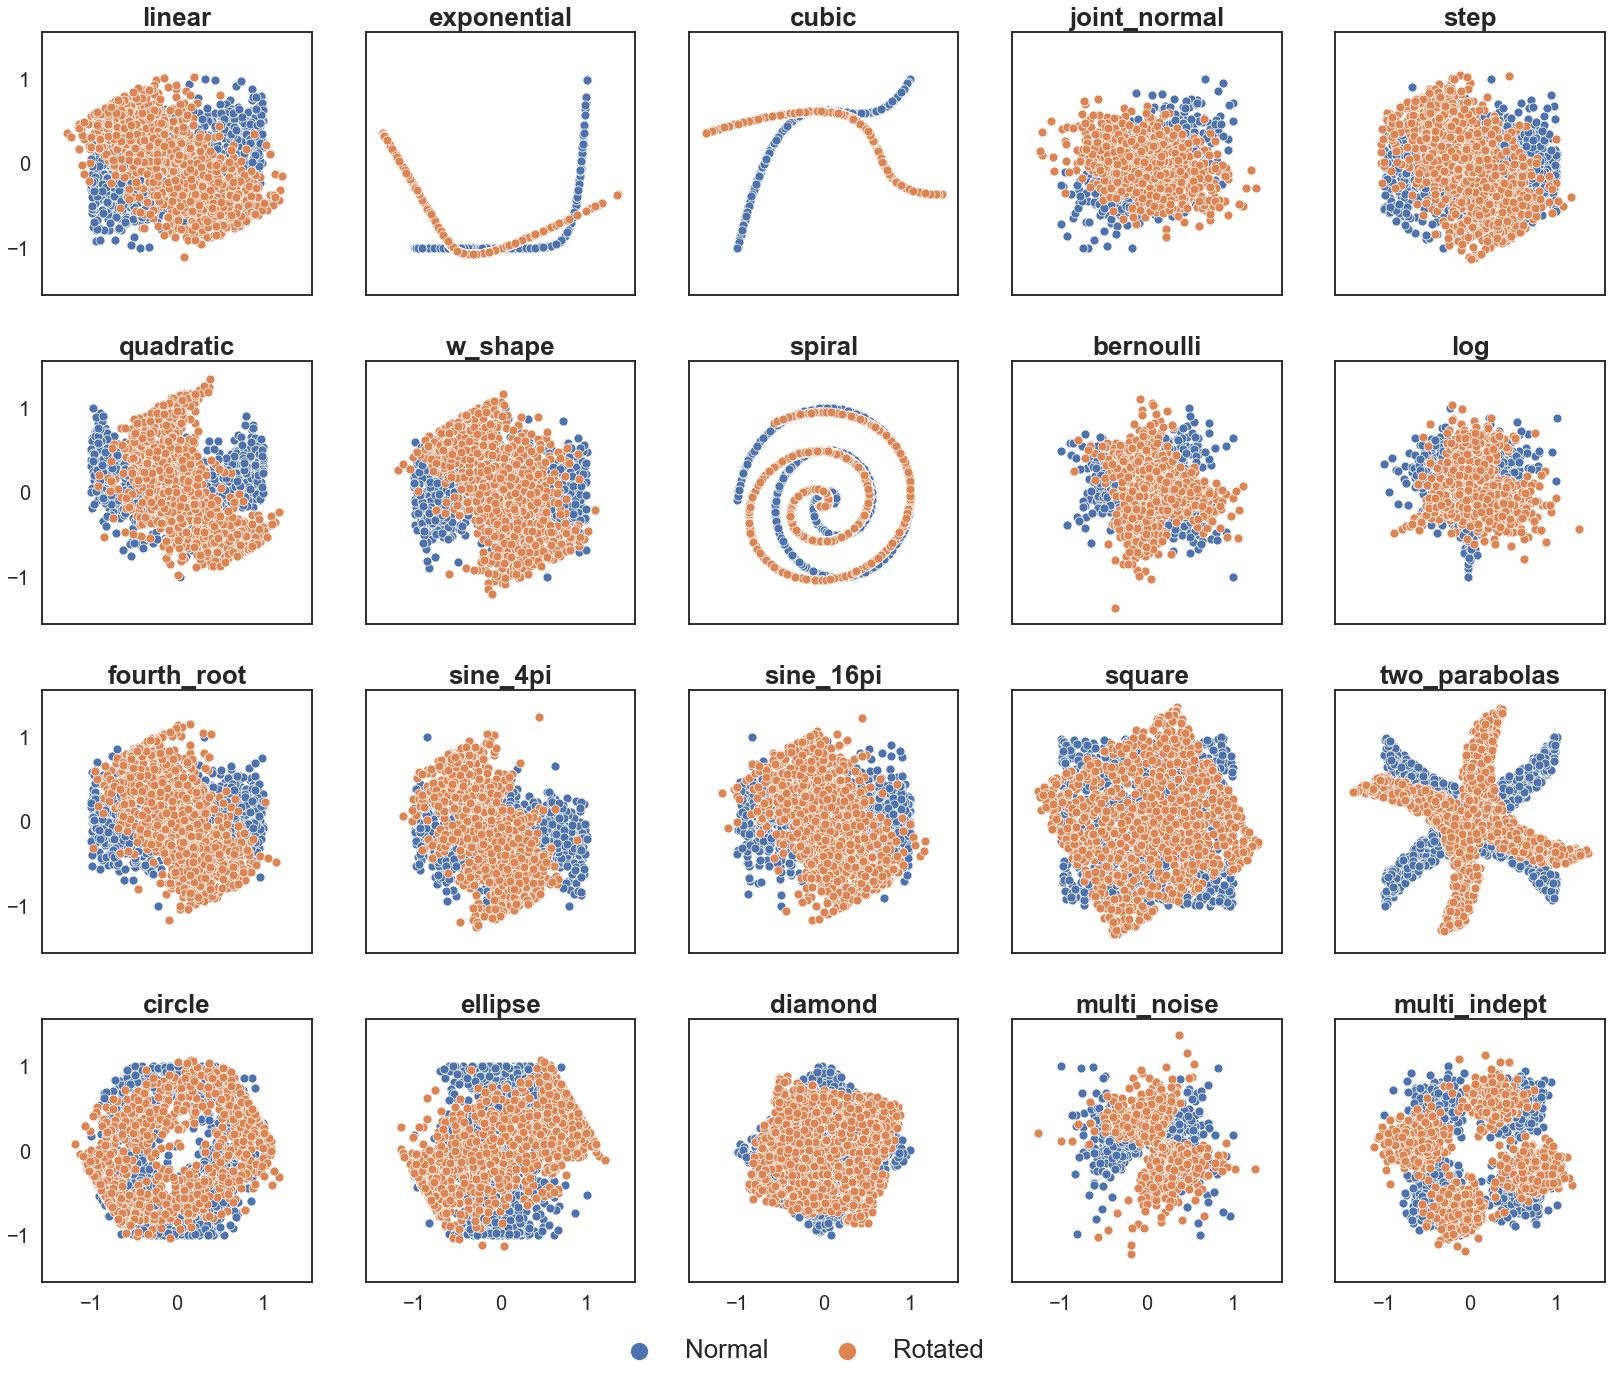

In [136]:
plot_all_simulations()

In [67]:
def plot_simulation(simulation_type):
    x, y = get_data(simulation_type)
    x_rotated, y_rotated = rotate_by_theta(x, y, 60)

    fig, axs = plt.subplots(ncols=2, figsize=(11.5, 5))

    p1 = axs[0].scatter(x, y, c='b')
    p2 = axs[1].scatter(x_rotated, y_rotated, c='r')
    axs[0].set_xticks([x.min(), 0, x.max()])
    axs[1].set_xticks([x.min(), 0, x.max()])

    fig.suptitle(simulation_names[simulation_type-1], fontweight='bold', fontsize='large')

    fig.legend([p1, p2], ["Normal", "Rotated"], bbox_to_anchor=(1.07, 0.3), bbox_transform=plt.gcf().transFigure)

    plt.show()

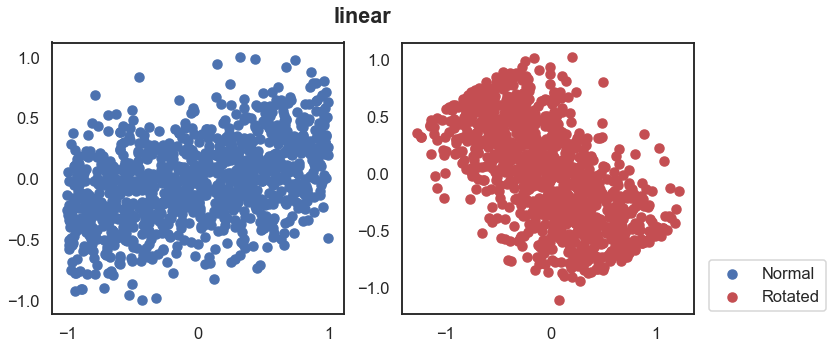

In [68]:
plot_simulation(1)

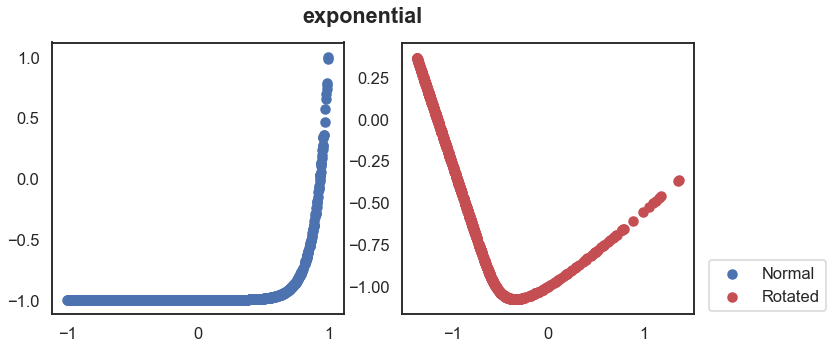

In [69]:
plot_simulation(2)

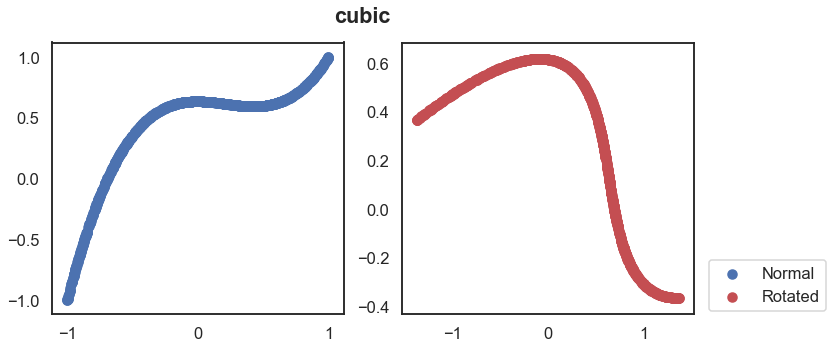

In [70]:
plot_simulation(3)

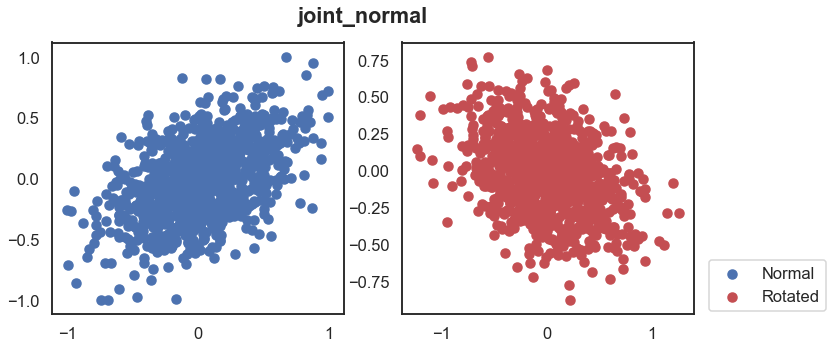

In [71]:
plot_simulation(4)

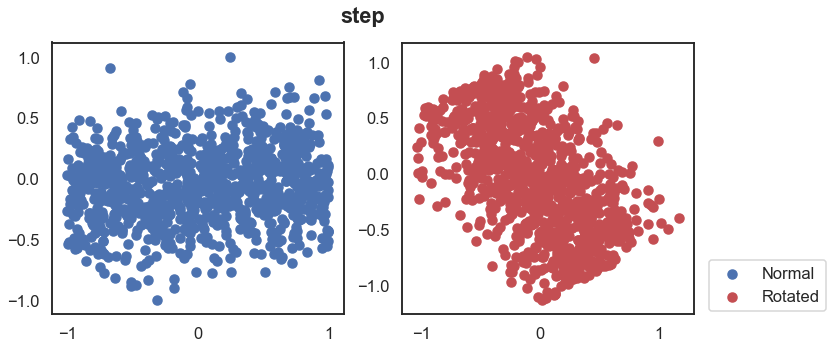

In [72]:
plot_simulation(5)

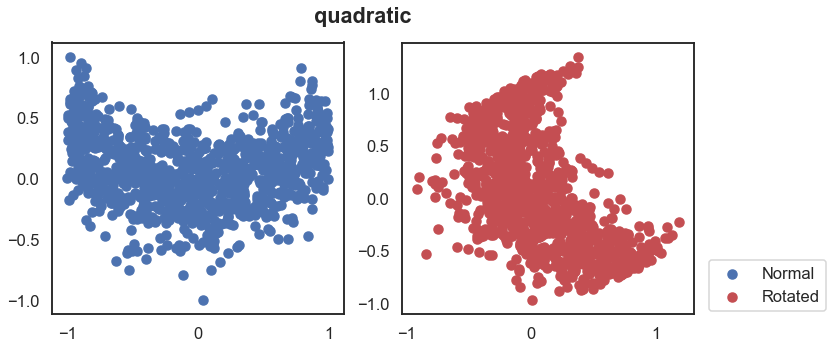

In [73]:
plot_simulation(6)

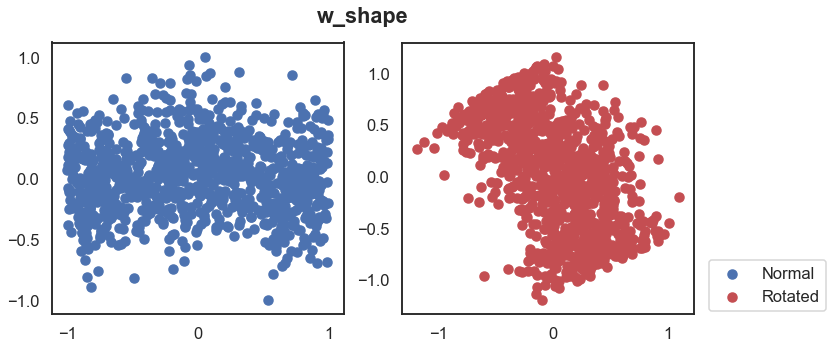

In [74]:
plot_simulation(7)

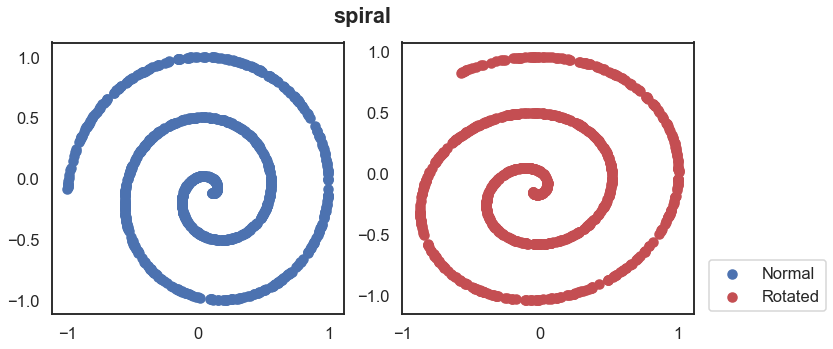

In [75]:
plot_simulation(8)

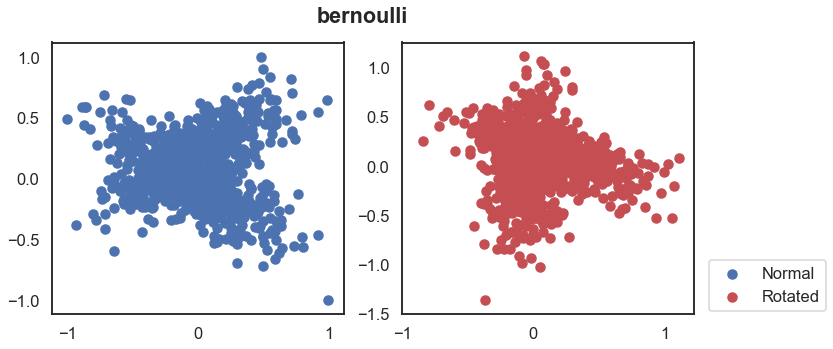

In [76]:
plot_simulation(9)

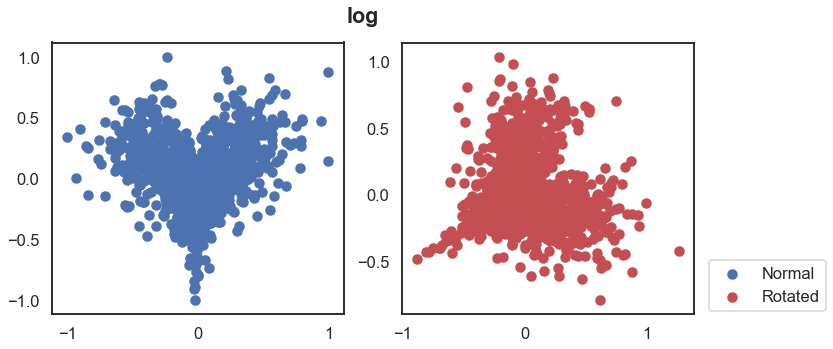

In [77]:
plot_simulation(10)

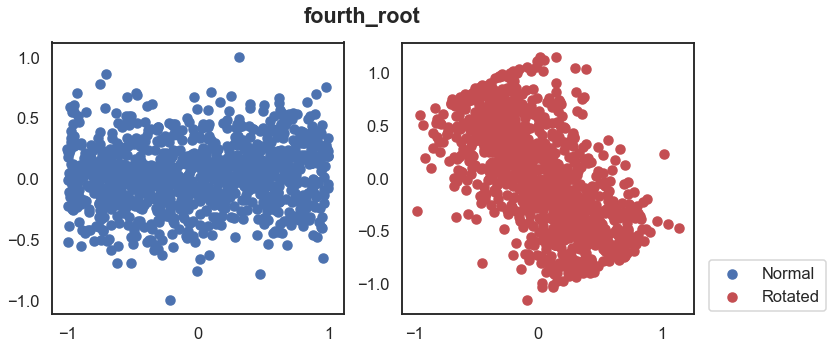

In [78]:
plot_simulation(11)

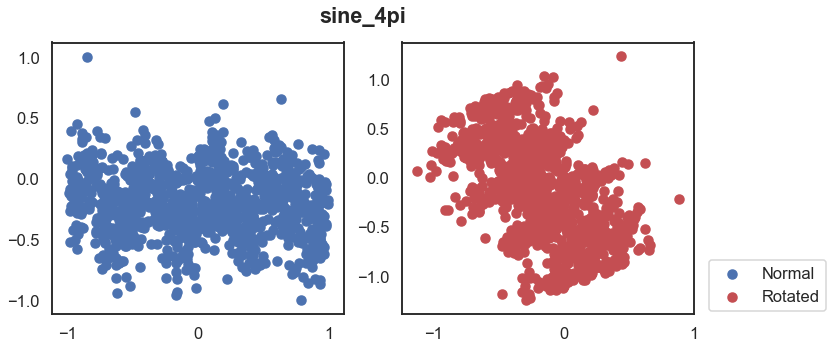

In [79]:
plot_simulation(12)

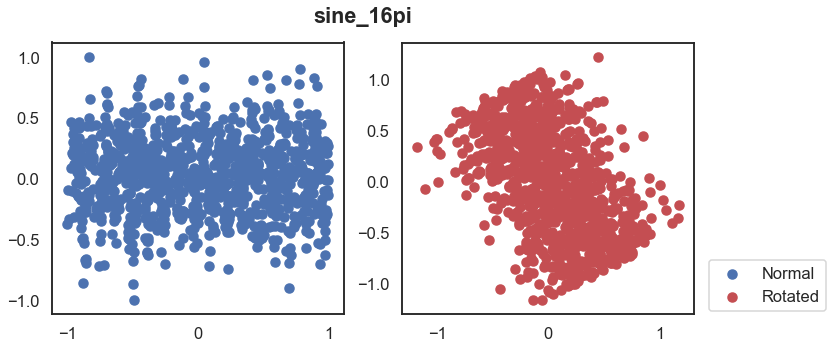

In [80]:
plot_simulation(13)

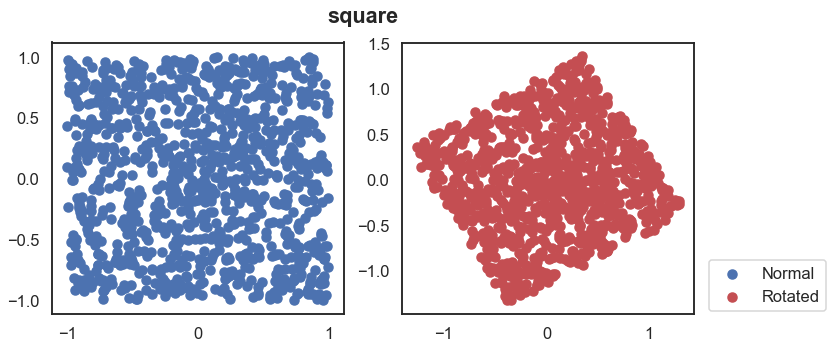

In [81]:
plot_simulation(14)

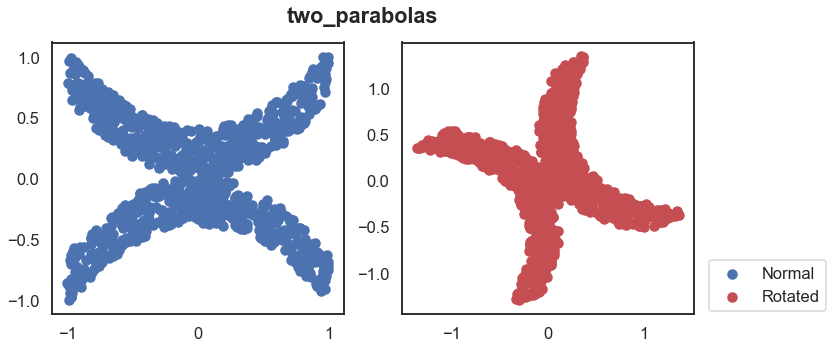

In [82]:
plot_simulation(15)

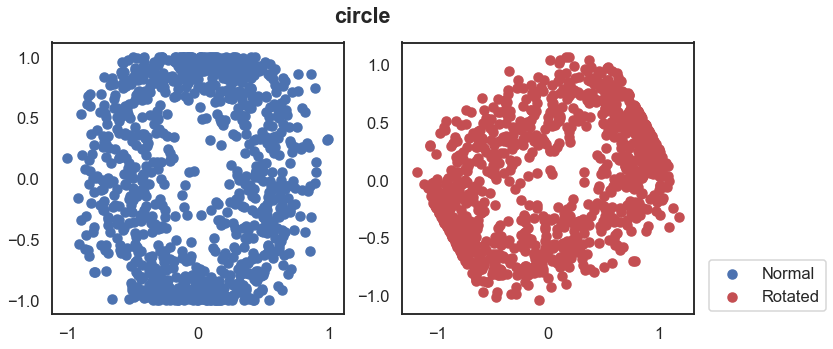

In [83]:
plot_simulation(16)

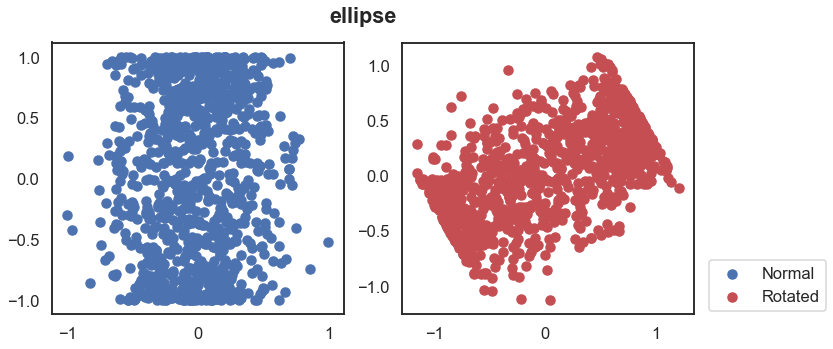

In [84]:
plot_simulation(17)

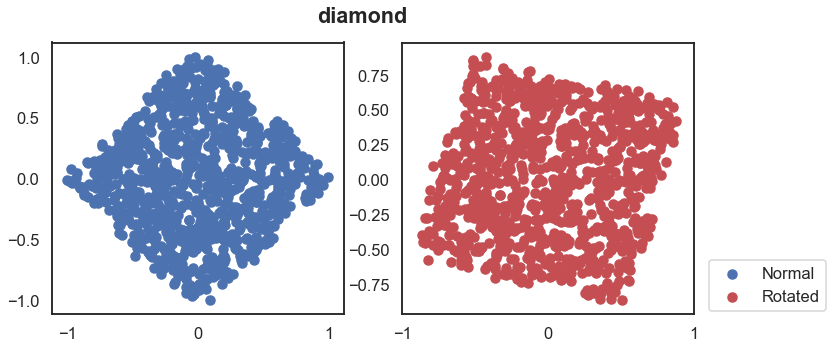

In [85]:
plot_simulation(18)

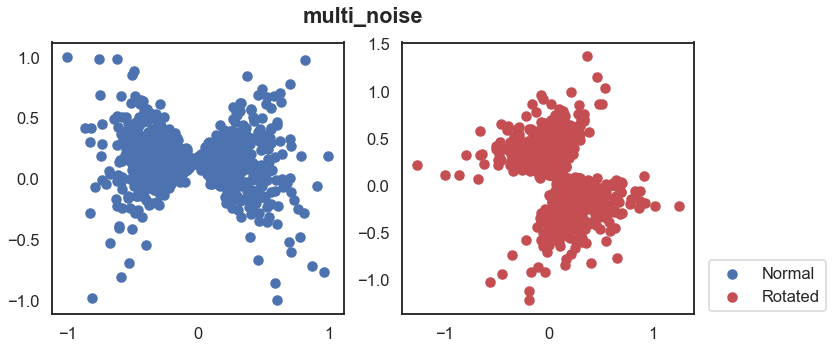

In [86]:
plot_simulation(19)

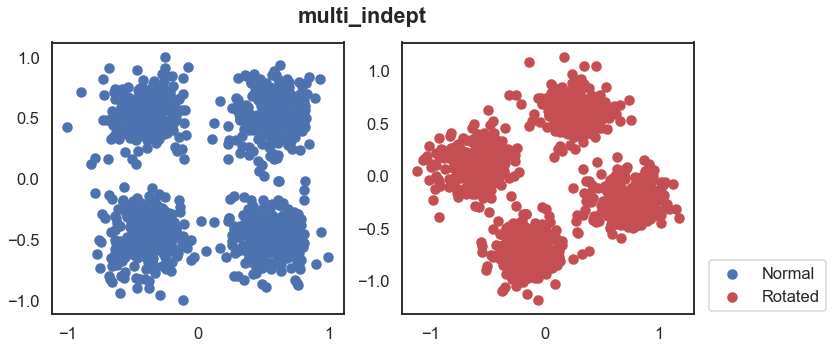

In [87]:
plot_simulation(20)

In [88]:
# plot means of the 3 sample 2-d gaussians

In [89]:
def get_equidistant_means(epsilon):
    return [0, (np.sqrt(3)/3)*epsilon], [-epsilon/2, -(np.sqrt(3)/6)*epsilon], [epsilon/2, -(np.sqrt(3)/6)*epsilon], [0, (np.sqrt(3)/3)*epsilon]

Text(1.0, -0.5773502691896257, 'mean 3')

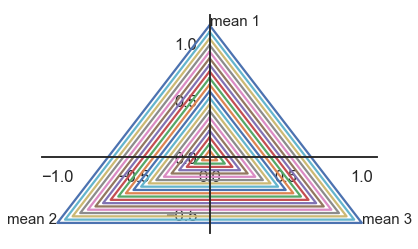

In [90]:
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.set_aspect("equal")

for i in np.arange(0, 2.1, 0.1):
    ax.plot(*list(zip(*get_equidistant_means(i))))

a, b, c, _ = get_equidistant_means(i)
ax.annotate("mean 1", a, fontsize=15)
ax.annotate("mean 2", b, fontsize=15, position=(b[0]-0.33, b[1]))
ax.annotate("mean 3", c, fontsize=15)